In [142]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [143]:
# function for displaying a grayscale image
def showImage(img, width, height):
    plt.rcParams['figure.figsize'] = [width, height]
    plt.imshow(img, cmap='gray')
    plt.show()

In [144]:
def laplasian(img):
    kernal = np.array( [[0, 1, 0],
                        [1, -4, 1], 
                        [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kernal.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # replicate the border for padding
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            val = int(np.sum(extracted * kernal))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [145]:
def robertCross(img):
    kx = np.array([ [0, 0, 0], 
                    [0, -1, 0], 
                    [0, 0, 1]])
                    
    ky = np.array([ [0, 0, 0], 
                    [0, 0, -1], 
                    [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # replicate the border for padding

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            temp1 = int(np.sum(extracted * kx))
            temp2 = int(np.sum(extracted * ky))
            val = abs(temp1) + abs(temp2)
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [146]:
def sobelOperator(img):
    kx = np.array([ [-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
    ky = np.array([ [-1,-2,-1], 
                    [0, 0, 0], 
                    [1, 2, 1]])
                    
    newimg = np.zeros(img.shape, dtype='uint8') 
    kernal_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernal_size//2, mode='edge') # borders padded with zero

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernal_size, col: col+kernal_size]
            temp1 = int(np.sum(extracted * kx))
            temp2 = int(np.sum(extracted * ky))
            val = abs(temp1) + abs(temp2) # !!!!!!!!!!!
            # val = math.sqrt((temp1**2) + (temp2**2))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg

In [147]:
def averagingFilter(img): 
    kern = np.ones([5, 5])
    # kern = kern / 25

    return cv2.filter2D(img, -1, kern, borderType=cv2.BORDER_CONSTANT)

In [ ]:
def powerTransform(img, gammaValue):
    temp = 255 * ((img/255)**gammaValue)
    return np.array(temp, dtype=np.uint8)

In [148]:
if __name__ == '__main__':
    # reading the image
    girl = cv2.imread('girl.jpg', 0)
    # showImage(girl, 5, 5)

In [149]:
    # lap1 = laplasian(girl)
    # lap2 = cv2.Laplacian(girl, -1, borderType=cv2.BORDER_REPLICATE)
    # showImage(cv2.hconcat([lap1, lap2]), 10, 5)

In [150]:
    # result = cv2.subtract(girl,lap1) # substracting since center coefficient of mask is negative
    # showImage(cv2.hconcat([girl, result]), 10, 5)

In [151]:
    # rob1 = robertCross(girl)
    # showImage(rob1, 5, 5)
    # result = cv2.subtract(girl, rob1)
    # showImage(cv2.hconcat([rob1, girl, result]), 15, 5)

In [152]:
    # sob1 = sobelOperator(girl)
    # result = cv2.subtract(girl, sob1)
    # showImage(cv2.hconcat([sob1, girl, result]), 15, 5) #! prolematic

In [153]:
    # sob2 = cv2.Sobel(girl, ddepth=-1, dx=1, dy=0, ksize=3, borderType=cv2.BORDER_REPLICATE)
    # sob3 = cv2.Sobel(girl, ddepth=-1, dx=0, dy=1, ksize=3, borderType=cv2.BORDER_REPLICATE)
    # sob4 = cv2.add(sob2, sob3)
    # result = cv2.subtract(girl, sob4)
    # showImage(cv2.hconcat([sob4, result]), 10, 5)

In [154]:
    """ task 2 """
    
    # reading the image
    girl2 = cv2.imread('girl2.jpg', 0)
    # showImage(girl2, 5, 5)

In [155]:
    # lap3 = cv2.Laplacian(girl2)
    lap3 = cv2.Laplacian(girl2, -1, borderType=cv2.BORDER_REPLICATE)
    # we should subtract
    # result = cv2.subtract(girl2, lap3)
    # showImage(cv2.hconcat([lap3, girl2, result]), 15, 5)

In [156]:
    # sobfilter = sobelOperator(girl2)
    # showImage(sobfilter, 5, 5)

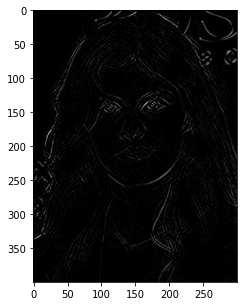

In [157]:
    # sob2 = cv2.Sobel(girl2, ddepth=-1, dx=0, dy=1, ksize=3, borderType=cv2.BORDER_REPLICATE)
    # sob3 = cv2.Sobel(girl2, ddepth=-1, dx=1, dy=0, ksize=3, borderType=cv2.BORDER_REPLICATE)
    # sobfilter = cv2.add(sob2, sob3)
    sobfilter = cv2.Sobel(girl2, ddepth=-1, dx=1, dy=1, ksize=3, borderType=cv2.BORDER_REPLICATE)
    showImage(sobfilter, 5, 5)

    # res = cv2.add(girl2, sobfilter)
    # showImage(cv2.hconcat([sobfilter, res]), 10, 5)

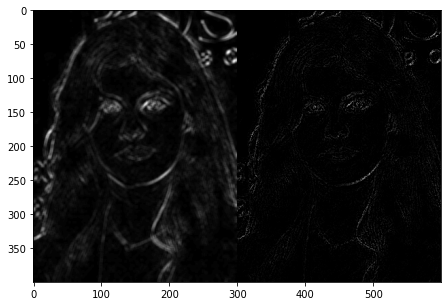

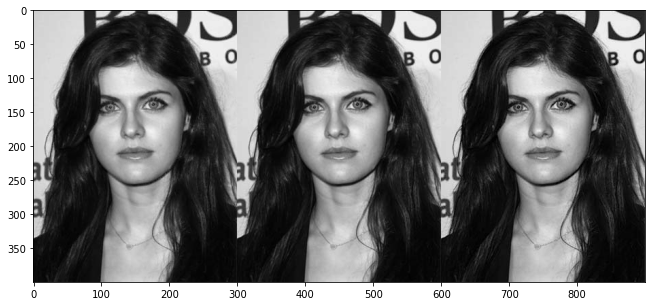

In [158]:
    avgSob = cv2.blur(sobfilter, (5,5)) # applying a 5x5 averaging filter
    # showImage(cv2.hconcat([lap3, avgSob]), 10, 5)
    res1 = cv2.bitwise_and(avgSob, lap3)
    showImage(cv2.hconcat([avgSob, res1]), 10, 5)

    added = cv2.add(girl2, res1)
    subd = cv2.subtract(girl2, res1)
    showImage(cv2.hconcat([added,girl2, subd]), 15, 5)